# 计算传播范围

In [2]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

import config
DB = config.get_DB()

In [3]:
import json

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [9]:
import src.main.util.spread as spread
import src.main.util.data_format as data_format

## DiSF_a

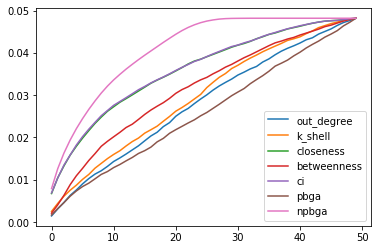

In [54]:
# g_name, beta, mean= 'DiSF_a', 0.0400, 4
g_name, beta, mean= 'DiSF_b', 0.0100, 20


base_path = os.path.join(DB, g_name)
seed_base_path = os.path.join(base_path, 'seed')
ss_base_path = os.path.join(base_path, 'ss')
gin_mat_path = os.path.join(os.path.join(base_path, 'gin_mat'), f'n{beta:.4f}.npz')
gout_sz_path = os.path.join(base_path, 'gout_sz.json')

criterions = ['out_degree', 'k_shell', 'closeness', 'betweenness', 'ci']

gin_mat = sparse.load_npz(gin_mat_path).toarray()
gout_szs = data_format.load_json(gout_sz_path)
gout_sz = gout_szs[f'{beta:.4f}']

y = {}
for c in criterions:
    seed_name = str(mean) + ' ' + c
    seed_path = os.path.join(seed_base_path, seed_name + '.json')
    ss_path = os.path.join(ss_base_path, seed_name + f' {beta:.4f}.json')
    seed_set = data_format.load_json(seed_path)
    
    sss = []
    for seeds in seed_set:
        ss = spread.spread_size(seeds, gin_mat, gout_sz)
        sss.append(ss)
    
    y[c] = list(np.array(sss).mean(axis=0) / gout_sz)

seed_pbga = data_format.load_json(f'db\\{g_name}\\seed\\{mean} pbga {beta:.4f}.json')
seed_npbga = data_format.load_json(f'db\\{g_name}\\seed\\{mean} npbga {beta:.4f}.json')

sss_pbga, sss_npbga = [], []
for i in range(len(seed_pbga)):
    sss_pbga.append(spread.spread_size(seed_pbga[i], gin_mat, gout_sz))
    sss_npbga.append(spread.spread_size(seed_npbga[i], gin_mat, gout_sz))    
y['pbga'] = list(np.array(sss_pbga).mean(axis=0) / gout_sz)
y['npbga'] = list(np.array(sss_npbga).mean(axis=0) / gout_sz)

x = list(range(50))

fig, ax = plt.subplots()
for k in y.keys():
    ax.plot(x, y[k], label=k)
ax.legend()

y['x'] = x
y['beta'] = beta
y['mean'] = mean
y['g_name'] = g_name
data_format.save_json(f'db\\{g_name}\\img\\main.json', y)

In [58]:
labels = ['NPBGA', 'PBGA', 'MCI', 'MC', 'MKS', 'MD']
new_data = {}
new_data['NPBGA'] = data['npbga']
new_data['PBGA'] = data['pbga']
new_data['MCI'] = data['ci']
new_data['MC'] = data['closeness']
new_data['MKS'] = data['k_shell']
new_data['MD'] = data['out_degree']
new_data['x'] = data['x']
new_data['g_name'] = data['g_name']
new_data['mean'] = data['mean']
new_data['beta'] = data['beta']
data_format.save_json(data_path, new_data)

In [87]:
labels = list(data['1'].keys())

In [88]:
labels

['NPBGA', 'PBGA', 'MD', 'MKS', 'MC', 'CI']

In [89]:
new_data = {}
for label in labels:
    new_data[label] = []
    for k in data.keys():
        new_data[label].append(data[k][label])
new_data

{'NPBGA': [0.108488,
  0.169026,
  0.214556,
  0.251069,
  0.282035,
  0.309495,
  0.334056,
  0.355964,
  0.375884,
  0.394132,
  0.410785,
  0.426077,
  0.440248,
  0.453325,
  0.46538,
  0.476503,
  0.486738,
  0.496279,
  0.505145,
  0.513465,
  0.521319,
  0.528714,
  0.535664,
  0.542234,
  0.548419,
  0.554212,
  0.559691,
  0.564898,
  0.569839,
  0.574522,
  0.578954,
  0.583174,
  0.587154,
  0.590928,
  0.594531,
  0.597968,
  0.601215,
  0.604331,
  0.607288,
  0.610088,
  0.612764,
  0.61533,
  0.617773,
  0.620051,
  0.622232,
  0.624293,
  0.626265,
  0.628131,
  0.629907,
  0.631588,
  0.633192,
  0.634716,
  0.636176,
  0.637562,
  0.638874,
  0.64013,
  0.641336,
  0.642479,
  0.643558,
  0.64459,
  0.645576,
  0.646507,
  0.647386,
  0.648225,
  0.649017,
  0.649762,
  0.650468,
  0.651142,
  0.651788,
  0.652388,
  0.652951,
  0.653488,
  0.653999,
  0.654472,
  0.654917,
  0.655333,
  0.655722,
  0.656084,
  0.656417,
  0.656735,
  0.657018,
  0.657274,
  0.657514,

In [90]:
new_data.keys()

dict_keys(['NPBGA', 'PBGA', 'MD', 'MKS', 'MC', 'CI'])

In [91]:
new_data['MCI'] = new_data['CI']
new_data.pop('CI')
new_data.keys()

dict_keys(['NPBGA', 'PBGA', 'MD', 'MKS', 'MC', 'MCI'])

In [92]:
new_data['g_name'] = 'Epinions'
new_data['mean'] = 7
new_data['beta'] = 0.0200
new_data['x'] = list(range(100))

In [93]:
data_format.save_json(data_path, new_data)

# Plot

In [94]:
g_name = 'Epinions'
data_path = f'db\\{g_name}\\img\\main.json'
data = data_format.load_json(data_path)

<IPython.core.display.Javascript object>


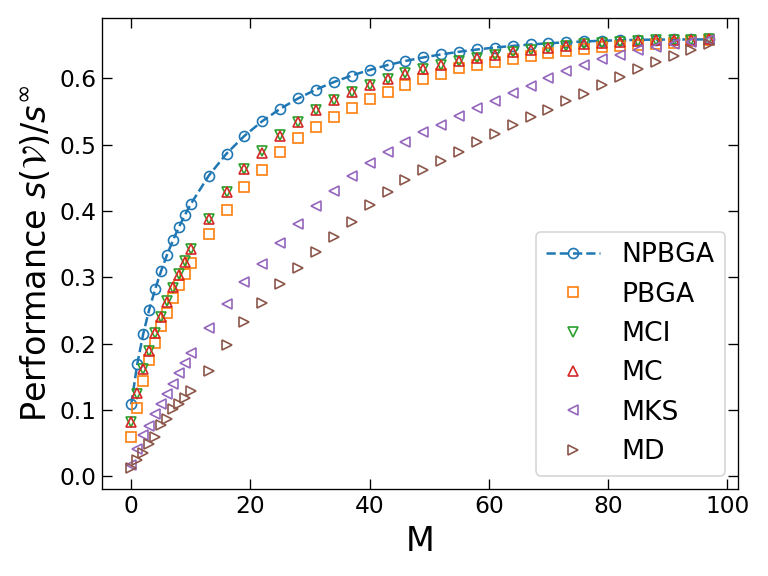

In [95]:
labels = ['NPBGA', 'PBGA', 'MCI', 'MC', 'MKS', 'MD']
fmts = ['o--', 's', 'v', '^', '<', '>']
x = np.array(list(range(10)) + list(range(10, 100, 3)))
fig, ax = plt.subplots()
ax.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(labelsize=14, length=6)
for i in range(len(labels)):
    ax.plot(np.array(data['x'])[x], np.array(data[labels[i]])[x], fmts[i], ms=6, mfc='None', label=labels[i])
ax.legend(fontsize=16)
ax.set_xlabel('M', fontsize=20)
ax.set_ylabel(r'Performance $s(\mathcal{V})/s^\infty$', fontsize=20)
fig.tight_layout()

In [96]:
fig.savefig(f'db\\{g_name}\\img\\main.png')